In [ ]:
pip install wordcloud

In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # ÌòπÏùÄ Îã§Î•∏ ÏÑ§ÏπòÌïú Nanum Ìè∞Ìä∏ ÏÇ¨Ïö©
import scipy
import scipy.stats as stats

df_sns = pd.read_csv("df_sns.csv")

# client=pymongo.MongoClient("trainings.iptime.org",48003)
# # client=pymongo.MongoClient("192.168.10.240",27017)
# db= client['AI_LKJ']
# yeomi_review = db['yeomi_review']
# yeomi_review = yeomi_review.find()
# yeomi_review = pd.DataFrame(yeomi_review)
# kto9suk9suk_review = db['kto9suk9suk_review']
# kto9suk9suk_review = kto9suk9suk_review.find()
# kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

In [3]:
df_sns

index                       _id  \
0            1  65f99f8608bfcc46ca19351e   
1            2  65f99f8608bfcc46ca19351f   
2            5  65f99f8b08bfcc46ca193522   
3            6  65f99f8b08bfcc46ca193523   
4            8  65f99f8d08bfcc46ca193525   
...        ...                       ...   
593961  599152  662af285f231019cd5b6186d   
593962  599154  662b80e0f231019cd5b61944   
593963  599155  662b80e0f231019cd5b61945   
593964  599156  662b80e1f231019cd5b61946   
593965  599157  662b80e1f231019cd5b61947   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
3       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
4       Ïö∏ÏÇ∞ Î™ÖÏÑ†ÎèÑÏùò Î∂àÍ≤å ÌÉÄÏò§Î•¥Îäî ÎÖ∏ÏùÑÍ≥º Ìï¥Î¨¥Ïùò Ïû•Í¥Ä\nÎßàÏπò Í∑∏Î¶ºÏùÑ Í∑∏Î†§ÎÜìÏùÄÎìØÌïú ÌíçÍ≤ΩÏóê ...  2014ÎÖÑ 7Ïõî 11Ïùº   
...                                                   ...           ...   
593961  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   
593962  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593963  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593964  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593965  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

       card_like  card_watch  check_point  \
0             50         NaN   pkcKuIzTJ0   
1             50         NaN   pkcKuIzTJ0   
2             42         NaN   qQx_BQTTBH   
3             42         NaN   qQx_BQTTBH   
4             58         NaN   qTGZrrzTAH   
...          ...         ...          ...   
593961      1288         NaN  C6I3IZBhfzp   
593962       123         NaN  C6OA2Fbhy5r   
593963       123         NaN  C6OA2Fbhy5r   
593964       123         NaN  C6OA2Fbhy5r   
593965       123         NaN  C6OA2Fbhy5r   

                                           review_content   review_date  \
0                                                Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº   
1                                                 Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº   
2                                            Ï†Ä ÎßêÏù¥ ÎêòÍ≥†Ïã∂Ïñ¥Ïöî^^  2014ÎÖÑ 7Ïõî 10Ïùº   
3                                              Beautiful~  2014ÎÖÑ 7Ïõî 10Ïùº   
4       Í∑ºÎç∞ Î™ÖÏÇ∞ÎèÑÎäî 3~4Ïõî Î¨ºÏù¥ Îπ†ÏßÄÎ©¥ Í±∏Ïñ¥Îì§Í∞à ÏàòÎäî ÏûàÏúºÎÇò ÌèâÏÉÅÏãú Ïó¨ÌñâÌï† ÏàòÏûàÎäî ÏÑ¨ÏùÄ...   2014ÎÖÑ 8Ïõî 5Ïùº   
...                                                   ...           ...   
593961                                   @ssukssuk_growup  2024ÎÖÑ 4Ïõî 24Ïùº   
593962                                           ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº   
593963                                  ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº   
593964          ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº   
593965                 @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº   

       region      city  
0         NaN       NaN  
1         NaN       NaN  
2          Ï†úÏ£º       #Ï†úÏ£º  
3          Ï

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## Ïó¨ÌñâÏóê ÎØ∏ÏπòÎã§ ÌéòÏù¥ÏßÄÏóêÏÑú Íµ≠ÎÇ¥ Ïó¨Ìñâ Í≤åÏãúÍ∏ÄÎßå Í∞ÄÏ†∏Ïò§Í∏∞

In [2]:
list_region = ['#Í∞ïÏõê','#Í≤ΩÍ∏∞','#Í≤ΩÎÇ®','#Í≤ΩÎ∂Å','#Í¥ëÏ£º','#ÎåÄÍµ¨','#ÎåÄÏ†Ñ','#Î∂ÄÏÇ∞','#ÏÑúÏö∏','#ÏÑ∏Ï¢Ö','#Ïö∏ÏÇ∞','#Ïù∏Ï≤ú','#Ï†ÑÎÇ®','#Ï†ÑÎ∂Å','#Ï†úÏ£º','#Ï∂©ÎÇ®','#Ï∂©Î∂Å','#Í∞ïÎ¶â','#Í≥†ÏÑ±','#ÎèôÌï¥','#ÏÇºÏ≤ô','#ÏÜçÏ¥à','#ÏñëÍµ¨','#ÏñëÏñë','#ÏòÅÏõî','#ÏõêÏ£º','#Ïù∏Ï†ú','#Ï†ïÏÑ†','#Ï≤†Ïõê','#Ï∂òÏ≤ú','#ÌÉúÎ∞±','#ÌèâÏ∞Ω','#ÌôçÏ≤ú','#ÌôîÏ≤ú','#Ìö°ÏÑ±','#Í∞ÄÌèâ','#Í≥†Ïñë','#Í≥ºÏ≤ú','#Í¥ëÎ™Ö','#Í¥ëÏ£º','#Íµ¨Î¶¨','#Íµ∞Ìè¨','#ÍπÄÌè¨','#ÎÇ®ÏñëÏ£º','#ÎèôÎëêÏ≤ú','#Î∂ÄÏ≤ú','#ÏÑ±ÎÇ®','#ÏàòÏõê','#ÏãúÌù•','#ÏïàÏÇ∞','#ÏïàÏÑ±','#ÏïàÏñë','#ÏñëÏ£º','#ÏñëÌèâ','#Ïó¨Ï£º','#Ïó∞Ï≤ú','#Ïò§ÏÇ∞','#Ïö©Ïù∏','#ÏùòÏôï','#ÏùòÏ†ïÎ∂Ä','#Ïù¥Ï≤ú','#ÌååÏ£º','#ÌèâÌÉù','#Ìè¨Ï≤ú','#ÌïòÎÇ®','#ÌôîÏÑ±','#Í±∞Ï†ú','#Í±∞Ï∞Ω','#Í≥†ÏÑ±','#ÍπÄÌï¥','#ÎÇ®Ìï¥','#Î∞ÄÏñë','#ÏÇ¨Ï≤ú','#ÏÇ∞Ï≤≠','#ÏñëÏÇ∞','#ÏùòÎ†π','#ÏßÑÏ£º','#Ï∞ΩÎÖï','#Ï∞ΩÏõê','#ÌÜµÏòÅ','#ÌïòÎèô','#Ìï®Ïïà','#Ìï®Ïñë','#Ìï©Ï≤ú','#Í≤ΩÏÇ∞','#Í≤ΩÏ£º','#Í≥†Î†π','#Íµ¨ÎØ∏','#ÍπÄÏ≤ú','#Î¨∏Í≤Ω','#Î¥âÌôî','#ÏÉÅÏ£º','#ÏÑ±Ï£º','#ÏïàÎèô','#ÏòÅÎçï','#ÏòÅÏñë','#ÏòÅÏ£º','#ÏòÅÏ≤ú','#ÏòàÏ≤ú','#Ïö∏Î¶â','#Ïö∏ÏßÑ','#ÏùòÏÑ±','#Ï≤≠ÎèÑ','#Ï≤≠ÏÜ°','#Ïπ†Í≥°','#Ìè¨Ìï≠','#Í¥ëÏÇ∞','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#ÏÑúÍµ¨','#Íµ∞ÏúÑ','#ÎÇ®Íµ¨','#Îã¨ÏÑú','#Îã¨ÏÑ±','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#ÏÑúÍµ¨','#ÏàòÏÑ±','#Ï§ëÍµ¨','#ÎåÄÎçï','#ÎèôÍµ¨','#ÏÑúÍµ¨','#Ïú†ÏÑ±','#Ï§ëÍµ¨','#Í∞ïÏÑú','#Í∏àÏ†ï','#Í∏∞Ïû•','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#ÎèôÎûò','#Î∂ÄÏÇ∞ÏßÑ','#Î∂ÅÍµ¨','#ÏÇ¨ÏÉÅ','#ÏÇ¨Ìïò','#ÏÑúÍµ¨','#ÏàòÏòÅ','#Ïó∞Ï†ú','#ÏòÅÎèÑ','#Ï§ëÍµ¨','#Ìï¥Ïö¥ÎåÄ','#Í∞ïÎÇ®','#Í∞ïÎèô','#Í∞ïÎ∂Å','#Í∞ïÏÑú','#Í¥ÄÏïÖ','#Í¥ëÏßÑ','#Íµ¨Î°ú','#Í∏àÏ≤ú','#ÎÖ∏Ïõê','#ÎèÑÎ¥â','#ÎèôÎåÄÎ¨∏','#ÎèôÏûë','#ÎßàÌè¨','#ÏÑúÎåÄÎ¨∏','#ÏÑúÏ¥à','#ÏÑ±Îèô','#ÏÑ±Î∂Å','#ÏÜ°Ìåå','#ÏñëÏ≤ú','#ÏòÅÎì±Ìè¨','#Ïö©ÏÇ∞','#ÏùÄÌèâ','#Ï¢ÖÎ°ú','#Ï§ëÍµ¨','#Ï§ëÎûë','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#Ïö∏Ï£º','#Ï§ëÍµ¨','#Í∞ïÌôî','#Í≥ÑÏñë','#ÎÇ®Îèô','#ÎèôÍµ¨','#ÎØ∏Ï∂îÌôÄ','#Î∂ÄÌèâ','#ÏÑúÍµ¨','#Ïó∞Ïàò','#ÏòπÏßÑ','#Ï§ëÍµ¨','#Í∞ïÏßÑ','#Í≥†Ìù•','#Í≥°ÏÑ±','#Í¥ëÏñë','#Íµ¨Î°Ä','#ÎÇòÏ£ºÏãú','#Îã¥Ïñë','#Î™©Ìè¨','#Î¨¥Ïïà','#Î≥¥ÏÑ±','#ÏàúÏ≤ú','#Ïã†Ïïà','#Ïó¨Ïàò','#ÏòÅÍ¥ë','#ÏòÅÏïî','#ÏôÑÎèÑ','#Ïû•ÏÑ±','#Ïû•Ìù•','#ÏßÑÎèÑ','#Ìï®Ìèâ','#Ìï¥ÎÇ®','#ÌôîÏàú','#Í≥†Ï∞Ω','#Íµ∞ÏÇ∞','#ÍπÄÏ†ú','#ÎÇ®Ïõê','#Î¨¥Ï£º','#Î∂ÄÏïà','#ÏàúÏ∞Ω','#ÏôÑÏ£º','#ÏùµÏÇ∞','#ÏûÑÏã§','#Ïû•Ïàò','#Ï†ÑÏ£º','#Ï†ïÏùç','#ÏßÑÏïà','#ÏÑúÍ∑ÄÌè¨','#Ï†úÏ£º','#Í≥ÑÎ£°','#Í≥µÏ£º','#Í∏àÏÇ∞','#ÎÖºÏÇ∞','#ÎãπÏßÑ','#Î≥¥Î†π','#Î∂ÄÏó¨','#ÏÑúÏÇ∞','#ÏÑúÏ≤ú','#ÏïÑÏÇ∞','#ÏòàÏÇ∞','#Ï≤úÏïà','#Ï≤≠Ïñë','#ÌÉúÏïà','#ÌôçÏÑ±','#Í¥¥ÏÇ∞','#Îã®Ïñë','#Î≥¥ÏùÄ','#ÏòÅÎèô','#Ïò•Ï≤ú','#ÏùåÏÑ±','#Ï†úÏ≤ú','#Ï¶ùÌèâ','#ÏßÑÏ≤ú','#Ï≤≠Ï£º','#Ï∂©Ï£º']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

_id  \
201      65f9bf4f08bfcc46ca193606   
202      65f9bf4f08bfcc46ca193607   
203      65f9bf4f08bfcc46ca193608   
204      65f9bf5008bfcc46ca193609   
205      65f9bf5008bfcc46ca19360a   
...                           ...   
1152424  662b80e0f231019cd5b61943   
1152425  662b80e0f231019cd5b61944   
1152426  662b80e0f231019cd5b61945   
1152427  662b80e1f231019cd5b61946   
1152428  662b80e1f231019cd5b61947   

                                              card_content     card_date  \
201      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
202      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
203      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
204      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
205      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
...                                                    ...           ...   
1152424  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152425  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152426  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152427  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152428  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

        card_like card_watch  check_point  \
201          7447             BePBx_qBqwm   
202          7447             BePBx_qBqwm   
203          7447             BePBx_qBqwm   
204          7447             BePBx_qBqwm   
205          7447             BePBx_qBqwm   
...           ...        ...          ...   
1152424       123             C6OA2Fbhy5r   
1152425       123             C6OA2Fbhy5r   
1152426       123             C6OA2Fbhy5r   
1152427       123             C6OA2Fbhy5r   
1152428       123             C6OA2Fbhy5r   

                                    review_content   review_date  
201                                            NaN           NaN  
202                                   @shorokhofff  2018ÎÖÑ 6Ïõî 22Ïùº  
203                @soye0114 Ïó¨Í∏∞ Îã§ÎãàÏóò ÎÆ§ÎπÑ Ï∞çÏùÄÍ≥≥Ïù∏Í∞Ä???!!!  2018ÎÖÑ 2Ïõî 24Ïùº  
204                            @h.a.ing ÏöîÍ∏∞Î¥ê „Öã„Öã„Öã„Öã„Öã„Öã   2018ÎÖÑ 2Ïõî 8Ïùº  
205                        @dal.hye Ïïº ÎÇò Ïó¨Í∏∞ Í∞ÄÍ≥†Ïã∂Ïñ¥„Ö†„Ö†„Ö†  2018ÎÖÑ 1Ïõî 28Ïùº  
...                                            ...           ...  
1152424                                        NaN           NaN  
1152425                                   ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº  
1152426                          ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº  
1152427  ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº  
1152428         @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº  

[473220 rows x 8 columns]

## Íµ¨ÏÑùÍµ¨ÏÑù ÌéòÏù¥ÏßÄÏôÄ Ïó¨ÌñâÏóê ÎØ∏ÏπòÎã§ ÌéòÏù¥ÏßÄÏóêÏÑú Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [4]:
kto9suk9suk_review

_id  \
0       65f99f8608bfcc46ca19351d   
1       65f99f8608bfcc46ca19351e   
2       65f99f8608bfcc46ca19351f   
3       65f99f8808bfcc46ca193520   
4       65f99f8b08bfcc46ca193521   
...                          ...   
125933  662a1fb44a4fe5fadf3f71ee   
125934  662f1d43b33c9dc30aa95f3f   
125935  662f1d4bb33c9dc30aa95f40   
125936  662f22cb5cb025207273f6f6   
125937  662f22d15cb025207273f6f7   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
3       Î©ãÏßÑ ÌíçÍ≤ΩÍ≥º Í∞êÎèô, Ïó¨ÌñâÍ≥º Ìú¥ÏãùÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏûàÎã§. Î∂ÄÏÇ∞ ÎßåÎçï Î†àÍ≥†ÎßàÏùÑ\...  2014ÎÖÑ 6Ïõî 23Ïùº   
4       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
...                                                   ...           ...   
125933  Ïã†Í∑ú Í∞úÏû• Í∏∞ÎÖê Î¨¥Î£å Ïö¥ÏòÅ Ï§ë(~5/6)‚Äº ÏßúÎ¶øÌï® ÏµúÍ≥†Ïù∏üòÜ ÍπÄÏ≤ú #ÏÇ¨Í≥ÑÏ†àÏç∞Îß§Ïû•\n\...  2024ÎÖÑ 4Ïõî 25Ïùº   
125934  Ï†úÏ£ºÎèÑ ÌÜ†Ï¢Ö ÏÜå, ÌùëÌïúÏö∞ ÏÇ¥Ïßù Î†àÏñ¥Î°ú ÏùµÌòÄ Ìïú ÏûÖÏóê ÏèòÏò•~!\nÏ∞∏ ÏàØÎ∂àÎ°ú Íµ¨Ïõå ÎçîÏö±...   2014ÎÖÑ 8Ïõî 5Ïùº   
125935  Î≤îÏÑ†Ïùò ÌúòÌô©Ï∞¨ÎûÄÌïú Ïã§Î£®Ïó£Ïù¥ ÏòÅÎçï ÎåÄÍ≤åÎ•º Î®πÏúºÎü¨ Ï∞æÎäî Î∞©Î¨∏Í∞ùÏùÑ Î∞òÍ∏∞Îäî Ïù¥Í≥≥ +_+ ÎåÄ...  2014ÎÖÑ 8Ïõî 26Ïùº   
125936  Ï†úÏ£ºÎèÑ ÌÜ†Ï¢Ö ÏÜå, ÌùëÌïúÏö∞ ÏÇ¥Ïßù Î†àÏñ¥Î°ú ÏùµÌòÄ Ìïú ÏûÖÏóê ÏèòÏò•~!\nÏ∞∏ ÏàØÎ∂àÎ°ú Íµ¨Ïõå ÎçîÏö±...   2014ÎÖÑ 8Ïõî 5Ïùº   
125937  Î≤îÏÑ†Ïùò ÌúòÌô©Ï∞¨ÎûÄÌïú Ïã§Î£®Ïó£Ïù¥ ÏòÅÎçï ÎåÄÍ≤åÎ•º Î®πÏúºÎü¨ Ï∞æÎäî Î∞©Î¨∏Í∞ùÏùÑ Î∞òÍ∏∞Îäî Ïù¥Í≥≥ +_+ ÎåÄ...  2014ÎÖÑ 8Ïõî 26Ïùº   

       card_like card_watch  check_point review_content   review_date  
0             50              pkcKuIzTJ0            NaN           NaN  
1             50              pkcKuIzTJ0       Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº  
2             50              pkcKuIzTJ0        Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº  
3             87              pk8YhwTTDR            NaN           NaN  
4             42              qQx_BQTTBH            NaN           NaN  
...          ...        ...          ...            ...           ...  
125933       106             C6LYPKTSzun              üõ∑  2024ÎÖÑ 4Ïõî 25Ïùº  
125934        81              rT9rIsTTNs            NaN           NaN  
125935       100              sJhwZxzTCf            NaN           NaN  
125936        81              rT9rIsTTNs            NaN           NaN  
125937       100              sJhwZxzTCf            NaN           NaN  

[125938 rows x 8 columns]

In [5]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns = df_sns[df_sns['review_content'].notna()]
df_sns = df_sns.reset_index()
df_sns

index                       _id  \
0            1  65f99f8608bfcc46ca19351e   
1            2  65f99f8608bfcc46ca19351f   
2            5  65f99f8b08bfcc46ca193522   
3            6  65f99f8b08bfcc46ca193523   
4            8  65f99f8d08bfcc46ca193525   
...        ...                       ...   
593961  599152  662af285f231019cd5b6186d   
593962  599154  662b80e0f231019cd5b61944   
593963  599155  662b80e0f231019cd5b61945   
593964  599156  662b80e1f231019cd5b61946   
593965  599157  662b80e1f231019cd5b61947   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
3       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
4       Ïö∏ÏÇ∞ Î™ÖÏÑ†ÎèÑÏùò Î∂àÍ≤å ÌÉÄÏò§Î•¥Îäî ÎÖ∏ÏùÑÍ≥º Ìï¥Î¨¥Ïùò Ïû•Í¥Ä\nÎßàÏπò Í∑∏Î¶ºÏùÑ Í∑∏Î†§ÎÜìÏùÄÎìØÌïú ÌíçÍ≤ΩÏóê ...  2014ÎÖÑ 7Ïõî 11Ïùº   
...                                                   ...           ...   
593961  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   
593962  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593963  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593964  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593965  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

       card_like card_watch  check_point  \
0             50              pkcKuIzTJ0   
1             50              pkcKuIzTJ0   
2             42              qQx_BQTTBH   
3             42              qQx_BQTTBH   
4             58              qTGZrrzTAH   
...          ...        ...          ...   
593961      1288             C6I3IZBhfzp   
593962       123             C6OA2Fbhy5r   
593963       123             C6OA2Fbhy5r   
593964       123             C6OA2Fbhy5r   
593965       123             C6OA2Fbhy5r   

                                           review_content   review_date  
0                                                Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº  
1                                                 Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº  
2                                            Ï†Ä ÎßêÏù¥ ÎêòÍ≥†Ïã∂Ïñ¥Ïöî^^  2014ÎÖÑ 7Ïõî 10Ïùº  
3                                              Beautiful~  2014ÎÖÑ 7Ïõî 10Ïùº  
4       Í∑ºÎç∞ Î™ÖÏÇ∞ÎèÑÎäî 3~4Ïõî Î¨ºÏù¥ Îπ†ÏßÄÎ©¥ Í±∏Ïñ¥Îì§Í∞à ÏàòÎäî ÏûàÏúºÎÇò ÌèâÏÉÅÏãú Ïó¨ÌñâÌï† ÏàòÏûàÎäî ÏÑ¨ÏùÄ...   2014ÎÖÑ 8Ïõî 5Ïùº  
...                                                   ...           ...  
593961                                   @ssukssuk_growup  2024ÎÖÑ 4Ïõî 24Ïùº  
593962                                           ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº  
593963                                  ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº  
593964          ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº  
593965                 @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº  

[593966 rows x 9 columns]

## Ïñ¥Îäê ÏßÄÏó≠Ïóê Í¥ÄÌïú ÌëúÏãú

In [6]:
region_gw = ['Í∞ïÏõêÎèÑ ','Í∞ïÏõê ','Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ ','#Í∞ïÏõê','#Í∞ïÎ¶â', '#Í≥†ÏÑ±', '#ÎèôÌï¥', '#ÏÇºÏ≤ô', '#ÏÜçÏ¥à', '#ÏñëÍµ¨', '#ÏñëÏñë', '#ÏòÅÏõî', '#ÏõêÏ£º', '#Ïù∏Ï†ú', '#Ï†ïÏÑ†', '#Ï≤†Ïõê', '#Ï∂òÏ≤ú', '#ÌÉúÎ∞±', '#ÌèâÏ∞Ω', '#ÌôçÏ≤ú', '#ÌôîÏ≤ú', '#Ìö°ÏÑ±']
region_gg = ['Í≤ΩÍ∏∞ÎèÑ ','Í≤ΩÍ∏∞ ','#Í≤ΩÍ∏∞','#Í∞ÄÌèâ', '#Í≥†Ïñë', '#Í≥ºÏ≤ú', '#Í¥ëÎ™Ö', '#Íµ¨Î¶¨', '#Íµ∞Ìè¨', '#ÍπÄÌè¨', '#ÎÇ®ÏñëÏ£º', '#ÎèôÎëêÏ≤ú', '#Î∂ÄÏ≤ú', '#ÏÑ±ÎÇ®', '#ÏàòÏõê', '#ÏãúÌù•', '#ÏïàÏÇ∞', '#ÏïàÏÑ±', '#ÏïàÏñë', '#ÏñëÏ£º', '#ÏñëÌèâ', '#Ïó¨Ï£º', '#Ïó∞Ï≤ú', '#Ïò§ÏÇ∞', '#Ïö©Ïù∏', '#ÏùòÏôï', '#ÏùòÏ†ïÎ∂Ä', '#Ïù¥Ï≤ú', '#ÌååÏ£º', '#ÌèâÌÉù', '#Ìè¨Ï≤ú', '#ÌïòÎÇ®', '#ÌôîÏÑ±']
region_gn = ['Í≤ΩÏÉÅÎÇ®ÎèÑ ','Í≤ΩÎÇ® ','#Í≤ΩÎÇ® ','#Í±∞Ï†ú', '#Í±∞Ï∞Ω', '#Í≥†ÏÑ±', '#ÍπÄÌï¥', '#ÎÇ®Ìï¥', '#Î∞ÄÏñë', '#ÏÇ¨Ï≤ú', '#ÏÇ∞Ï≤≠', '#ÏñëÏÇ∞', '#ÏùòÎ†π', '#ÏßÑÏ£º', '#Ï∞ΩÎÖï', '#Ï∞ΩÏõê', 'ÌÜµÏòÅ', '#ÌïòÎèô', '#Ìï®Ïïà', '#Ìï®Ïñë', '#Ìï©Ï≤ú']
region_gb = ['Í≤ΩÏÉÅÎ∂ÅÎèÑ ','Í≤ΩÎ∂Å ','#Í≤ΩÎ∂Å','#Í≤ΩÏÇ∞', '#Í≤ΩÏ£º', '#Í≥†Î†π', '#Íµ¨ÎØ∏', '#ÍπÄÏ≤ú', '#Î¨∏Í≤Ω', '#Î¥âÌôî', '#ÏÉÅÏ£º', '#ÏÑ±Ï£º', '#ÏïàÎèô', '#ÏòÅÎçï', '#ÏòÅÏñë', '#ÏòÅÏ£º', '#ÏòÅÏ≤ú', '#ÏòàÏ≤ú', '#Ïö∏Î¶â', '#Ïö∏ÏßÑ', '#ÏùòÏÑ±', '#Ï≤≠ÎèÑ', '#Ï≤≠ÏÜ°', '#Ïπ†Í≥°', '#Ìè¨Ìï≠']
region_gj = ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ','Í¥ëÏ£º ','#Í¥ëÏ£º','#Í¥ëÏÇ∞']
region_dg = ['ÎåÄÍµ¨Í¥ëÏó≠Ïãú ','ÎåÄÍµ¨ ','#ÎåÄÍµ¨','#Íµ∞ÏúÑ', '#Îã¨ÏÑú', '#Îã¨ÏÑ±', '#ÏàòÏÑ±']
region_dj = ['ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú ','ÎåÄÏ†Ñ ','#ÎåÄÏ†Ñ','#ÎåÄÎçï',   '#Ïú†ÏÑ±']
region_sj = ['ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú ','ÏÑ∏Ï¢Ö ','#ÏÑ∏Ï¢Ö']
region_bs = ['Î∂ÄÏÇ∞ÌäπÎ≥ÑÏãú ','Î∂ÄÏÇ∞ ','#Î∂ÄÏÇ∞', '#Í∏àÏ†ï', '#Í∏∞Ïû•',  '#ÎèôÎûò', '#Î∂ÄÏÇ∞ÏßÑ', '#ÏÇ¨ÏÉÅ', '#ÏÇ¨Ìïò',  '#ÏàòÏòÅ', '#Ïó∞Ï†ú', '#ÏòÅÎèÑ',  '#Ìï¥Ïö¥ÎåÄ']
region_su = ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú ','ÏÑúÏö∏ ','#ÏÑúÏö∏','#Í∞ïÎÇ®', '#Í∞ïÎèô', '#Í∞ïÎ∂Å', '#Í¥ÄÏïÖ', '#Í¥ëÏßÑ', '#Íµ¨Î°ú', '#Í∏àÏ≤ú', '#ÎÖ∏Ïõê', '#ÎèÑÎ¥â', '#ÎèôÎåÄÎ¨∏', '#ÎèôÏûë', '#ÎßàÌè¨', '#ÏÑúÎåÄÎ¨∏', '#ÏÑúÏ¥à', '#ÏÑ±Îèô', '#ÏÑ±Î∂Å', '#ÏÜ°Ìåå', '#ÏñëÏ≤ú', '#ÏòÅÎì±Ìè¨', '#Ïö©ÏÇ∞', '#ÏùÄÌèâ', '#Ï¢ÖÎ°ú',  '#Ï§ëÎûë']
region_us = ['Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú ', 'Ïö∏ÏÇ∞ ','#Ïö∏ÏÇ∞', '#Ïö∏Ï£º']
region_ic = ['Ïù∏Ï≤úÍ¥ëÏó≠Ïãú ','Ïù∏Ï≤ú ','#Ïù∏Ï≤ú','#Í∞ïÌôî', '#Í≥ÑÏñë', '#ÎÇ®Îèô',  '#ÎØ∏Ï∂îÌôÄ', '#Î∂ÄÌèâ',  '#Ïó∞Ïàò', '#ÏòπÏßÑ']
region_jn = ['Ï†ÑÎùºÎÇ®ÎèÑ ','Ï†ÑÎÇ® ','#Í∞ïÏßÑ', '#Ï†ÑÎÇ®','#Í≥†Ìù•', '#Í≥°ÏÑ±', '#Í¥ëÏñë', '#Íµ¨Î°Ä', '#ÎÇòÏ£º', '#Îã¥Ïñë', '#Î™©Ìè¨', '#Î¨¥Ïïà', '#Î≥¥ÏÑ±', '#ÏàúÏ≤ú', '#Ïã†Ïïà', '#Ïó¨Ïàò', '#ÏòÅÍ¥ë', '#ÏòÅÏïî', '#ÏôÑÎèÑ', '#Ïû•ÏÑ±', '#Ïû•Ìù•', '#ÏßÑÎèÑ', '#Ìï®Ìèâ', '#Ìï¥ÎÇ®', '#ÌôîÏàú']
region_jb = ['Ï†ÑÎùºÎ∂ÅÎèÑ ','Ï†ÑÎ∂Å ','#Í≥†Ï∞Ω', '#Ï†ÑÎ∂Å','#Íµ∞ÏÇ∞', '#ÍπÄÏ†ú', '#ÎÇ®Ïõê', '#Î¨¥Ï£º', '#Î∂ÄÏïà', '#ÏàúÏ∞Ω', '#ÏôÑÏ£º', '#ÏùµÏÇ∞', '#ÏûÑÏã§', '#Ïû•Ïàò', '#Ï†ÑÏ£º', '#Ï†ïÏùç', '#ÏßÑÏïà']
region_jj = ['Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ ','Ï†úÏ£º ','#ÏÑúÍ∑ÄÌè¨', '#Ï†úÏ£º']
region_cn = ['Ï∂©Ï≤≠ÎÇ®ÎèÑ ','Ï∂©ÎÇ® ','#Ï∂©ÎÇ®','#Í≥ÑÎ£°', '#Í≥µÏ£º', '#Í∏àÏÇ∞', '#ÎÖºÏÇ∞', '#ÎãπÏßÑ', '#Î≥¥Î†π', '#Î∂ÄÏó¨', '#ÏÑúÏÇ∞', '#ÏÑúÏ≤ú', '#ÏïÑÏÇ∞', '#ÏòàÏÇ∞', '#Ï≤úÏïà', '#Ï≤≠Ïñë', '#ÌÉúÏïà', '#ÌôçÏÑ±']
region_cb = ['Ï∂©Ï≤≠Î∂ÅÎèÑ ','Ï∂©Î∂Å ','#Ï∂©Î∂Å','#Í¥¥ÏÇ∞', '#Îã®Ïñë', '#Î≥¥ÏùÄ', '#ÏòÅÎèô', '#Ïò•Ï≤ú', '#ÏùåÏÑ±', '#Ï†úÏ≤ú', '#Ï¶ùÌèâ', '#ÏßÑÏ≤ú', '#Ï≤≠Ï£º', '#Ï∂©Ï£º']

In [7]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í∞ïÏõê')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÍ∏∞')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÎÇ®')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í¥ëÏ£º')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÎ∂Å')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÏÑ∏Ï¢Ö')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÎåÄÍµ¨')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÎåÄÏ†Ñ')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('Î∂ÄÏÇ∞')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÏÑúÏö∏')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ïö∏ÏÇ∞')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ïù∏Ï≤ú')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†ÑÎÇ®')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†ÑÎ∂Å')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†úÏ£º')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï∂©ÎÇ®')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï∂©Î∂Å')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## ÎåìÍ∏ÄÏóê Í¥ÄÌïú Îç∞Ïù¥ÌÑ∞ÏôÄ Ï†úÎ™©Ïóê Í¥ÄÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò

In [8]:
df_sns.to_csv('df_sns.csv',index=False)


In [9]:
df_sns

index                       _id  \
0            1  65f99f8608bfcc46ca19351e   
1            2  65f99f8608bfcc46ca19351f   
2            5  65f99f8b08bfcc46ca193522   
3            6  65f99f8b08bfcc46ca193523   
4            8  65f99f8d08bfcc46ca193525   
...        ...                       ...   
593961  599152  662af285f231019cd5b6186d   
593962  599154  662b80e0f231019cd5b61944   
593963  599155  662b80e0f231019cd5b61945   
593964  599156  662b80e1f231019cd5b61946   
593965  599157  662b80e1f231019cd5b61947   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
3       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
4       Ïö∏ÏÇ∞ Î™ÖÏÑ†ÎèÑÏùò Î∂àÍ≤å ÌÉÄÏò§Î•¥Îäî ÎÖ∏ÏùÑÍ≥º Ìï¥Î¨¥Ïùò Ïû•Í¥Ä\nÎßàÏπò Í∑∏Î¶ºÏùÑ Í∑∏Î†§ÎÜìÏùÄÎìØÌïú ÌíçÍ≤ΩÏóê ...  2014ÎÖÑ 7Ïõî 11Ïùº   
...                                                   ...           ...   
593961  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   
593962  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593963  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593964  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
593965  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

       card_like card_watch  check_point  \
0             50              pkcKuIzTJ0   
1             50              pkcKuIzTJ0   
2             42              qQx_BQTTBH   
3             42              qQx_BQTTBH   
4             58              qTGZrrzTAH   
...          ...        ...          ...   
593961      1288             C6I3IZBhfzp   
593962       123             C6OA2Fbhy5r   
593963       123             C6OA2Fbhy5r   
593964       123             C6OA2Fbhy5r   
593965       123             C6OA2Fbhy5r   

                                           review_content   review_date  \
0                                                Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº   
1                                                 Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº   
2                                            Ï†Ä ÎßêÏù¥ ÎêòÍ≥†Ïã∂Ïñ¥Ïöî^^  2014ÎÖÑ 7Ïõî 10Ïùº   
3                                              Beautiful~  2014ÎÖÑ 7Ïõî 10Ïùº   
4       Í∑ºÎç∞ Î™ÖÏÇ∞ÎèÑÎäî 3~4Ïõî Î¨ºÏù¥ Îπ†ÏßÄÎ©¥ Í±∏Ïñ¥Îì§Í∞à ÏàòÎäî ÏûàÏúºÎÇò ÌèâÏÉÅÏãú Ïó¨ÌñâÌï† ÏàòÏûàÎäî ÏÑ¨ÏùÄ...   2014ÎÖÑ 8Ïõî 5Ïùº   
...                                                   ...           ...   
593961                                   @ssukssuk_growup  2024ÎÖÑ 4Ïõî 24Ïùº   
593962                                           ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº   
593963                                  ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº   
593964          ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº   
593965                 @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº   

       region      city  
0                        
1                        
2          Ï†úÏ£º       #Ï†úÏ£º  
3          Ï†úÏ£º       

In [9]:
df_sns['review_content'] = df_sns['review_content'].astype('str')

## ÌÉúÍ∑∏ÏôÄ Í¥ÄÎ†®Îêú Îã®Ïñ¥ Ï†úÍ±∞

In [11]:
def split(text):
    clean_text = []
    for word in text.split():
        if word.startswith('@'):
            pass
        else:
            clean_text.append(word)
    return " ".join(clean_text)

In [12]:
df_sns.loc[:,'review_content'] = df_sns['review_content'].apply(split)
df_sns.query("review_content.str.contains('@')")

index                       _id  \
390        459  65facb853d093f346325208f   
578        690  65fbdbf9e60f7a9a412f0446   
673        811  65fbdc36e60f7a9a412f04bf   
997       1230  65fd6a598cbcc379b4584772   
1032      1275  65fe13048cbcc379b45855fa   
...        ...                       ...   
591412  596575  662a3ea54a4fe5fadf3f78a5   
591617  596780  662a3eb04a4fe5fadf3f7972   
592408  597581  662a4d9ef231019cd5b5d3fa   
592685  597859  662a6853f231019cd5b5d7f8   
593648  598830  662aa2d8f231019cd5b60266   

                                             card_content      card_date  \
390     Í≤ΩÍ∏∞ÎèÑ #ÏñëÌèâ ÏÑ∏ÎØ∏Ïõê ÏóêÏÑú ÎßåÎÇú Ïã±Í∑∏Îü¨Ïö¥ Ï¥àÎ°ù ÌíçÍ≤Ω! It's healing tim...    2014ÎÖÑ 9Ïõî 9Ïùº   
578     Î∂âÏùÄÎπõÍ≥º Ìë∏Î•∏ÎπõÏù¥ ÏòÅÎ°±ÌïòÍ≤å Î¨º ÏúÑÎ°ú ÏèüÏïÑÏ†∏ ÎÇ¥Î¶¨Îäî Ïó¨Í∏∞Îäî ÎåÄÏ†Ñ ÏóëÏä§Ìè¨ Îã§Î¶¨! Í≤¨Ïö∞ÏßÅ...  2014ÎÖÑ 10Ïõî 23Ïùº   
673     Í≤ΩÏÇ∞ÏãúÏû•ÏóêÏÑú ÎßåÎÇú Îú®ÎÅàÌïòÍ≥† Îß§ÏΩ§Ìïú Ïñ¥Î¨µÍº¨Ïπò! Îî∞ÎúªÌïú Íµ≠Î¨ºÏù¥ Ï¢ãÏùÄÍ±∏ Î≥¥Îãà Í≤®Ïö∏Ïù¥ ÏÑ±ÌÅº...  2014ÎÖÑ 11Ïõî 18Ïùº   
997     Í∏∏ÏóàÎçò Ïó∞Ìú¥Ïùò ÎßâÎ∞îÏßÄ. ÏÉàÎ°úÏö¥ Ìïú Ï£ºÎ•º Ï§ÄÎπÑÌïòÎ©∞ Ïó¨Ïú†Î°úÏö¥ Î©ãÏù¥ ÌùêÎ•¥Îäî Ï∂©Î∂Å ÏòÅÎèô Ïõî...   2015ÎÖÑ 2Ïõî 22Ïùº   
1032    Í∞ì Íµ¨ÏõåÏßÑ Îî∞ÎÅàÎî∞ÎÅàÌïú ÌååÏù¥ ÎÉÑÏÉàÍ∞Ä Ïó¨Í∏∞ÍπåÏßÄ Ï†ÑÌï¥ÏßÄÎäî Í≤É Í∞ôÏßÄ ÏïäÎÇòÏöî~? :) Ïù¥Í≥≥ÏùÄ...    2015ÎÖÑ 3Ïõî 4Ïùº   
...                                                   ...            ...   
591412  ‚ÄúÏïà ÎêòÎäîÍ±∏ ÎêòÍ≤å ÌïòÎ©¥ ÎêòÏûñÏïÑÏöî‚Äú Í∑∏ÎûòÏÑú Ïö∞Î¶¨Îäî ÎààÏò§Î¶¨ ÎåÄÏã† ÌùôÏò§Î¶¨Î•º ÎßåÎì†ÎãµÎãàÎã§?\...   2024ÎÖÑ 1Ïõî 19Ïùº   
591617  ‚ÄúÏïà ÎêòÎäîÍ±∏ ÎêòÍ≤å ÌïòÎ©¥ ÎêòÏûñÏïÑÏöî‚Äú Í∑∏ÎûòÏÑú Ïö∞Î¶¨Îäî ÎààÏò§Î¶¨ ÎåÄÏã† ÌùôÏò§Î¶¨Î•º ÎßåÎì†ÎãµÎãàÎã§?\...   2024ÎÖÑ 1Ïõî 19Ïùº   
592408  ‚ÄúÎÇ¥Í∞Ä ÏÑúÏö∏ Ï¢Ä ÏïàÎã§?‚Äù Ï£ºÎ™©üëÄ #Í¥ëÍ≥†\nÎÇòÎßå ÏïåÍ≥†Ïã∂ÏùÄ ÏÑúÏö∏Ïùò Ïà®ÏùÄ Ïû•ÏÜåÍ∞Ä ÏûàÎã§Î©¥?...    2024ÎÖÑ 2Ïõî 8Ïùº   
592685  Ïù¥Ïïº Ïó¨Í∏∞ Ïª®ÏÖâ ÎßõÏßëÏù¥ÎÑ§ „Öã„Öã„Öã„Öã„Öãüëç\n\nÏÑ∏Ïã¨Ìïú Î∂ÄÎ∂ÑÍπåÏßÄ Ìè¨Ïù∏Ìä∏ ÎÑò Ïûò ÏÇ¥Î¶∞Í±∞ ÏïÑ...   2024ÎÖÑ 2Ïõî 13Ïùº   
593648  Î¥ÑÎ¥ÑÎ¥ÑÎ¥ÑÏù¥ Ïò§Î©¥, ÎÇòÎäî ÏÑúÏö∏ÎåÄÍ≥µÏõêÏùÑ Í∞Ä üå∏ Î≤öÍΩÉ ÌóåÌÑ∞Îì§Ïù¥ ÏÇ¨ÎûëÌïú, ÏµúÍ≥†Ïùò Î≤öÍΩÉ ÎßõÏßë...   2024ÎÖÑ 3Ïõî 19Ïùº   

       card_like  card_watch  check_point  \
390          118         NaN   stleS6TTAe   
578          125         NaN   ufCjFazTDs   
673          145         NaN   vh6aTcTTKr   
997          177         NaN   zYx5axTTFt   
1032         135         NaN   zzADJhTTC5   
...          ...         ...          ...   
591412     12.4Îßå         NaN  C2Q5szLhpdh   
591617     12.4Îßå         NaN  C2Q5szLhpdh   
592408      1934         NaN  C3FYUTQBnWW   
592685      6772         NaN  C3SB6jMhp6m   
593648      3655         NaN  C4rZG_BhBIG   

                                           review_content    review_date  \
390                          ÏàòÍ≤ΩÏïÑ ÏÑ∏ÎØ∏ÏõêÏù¥Îã§!^@^ Ïö∞Î¶¨Í∞Ä Í±∏Ïñ¥Ïò® Í∏∏...„Öé„Öé    2014ÎÖÑ 9Ïõî 9Ïùº   
578                           „Öã„Öã„Öã„Öã #ÎÇòÎèÑÏ†àÏ†àÌïúÏÇ¨ÎûëÏ¢Ä „Öã„Öã„Öã„Öã@yoon.km  2014ÎÖÑ 10Ïõî 23Ïùº   
673                                       ÏïÑÎåÄÎ∞ï...@jammang_  2014ÎÖÑ 11Ïõî 18Ïùº   
997                     Ï†ÄÍ∏¥ ÏïÑÏßÅÎèÑ ÎØ∏ÏßÄÏùò ÏÑ∏Í≥Ñ.....„Öã„Öã„Öã„Öã„Öã„Öã@mis_7211   2015ÎÖÑ 3Ïõî 23Ïùº   
1032    Ïïó~!! Í±∞ÎëêÎ¶¨.....@.@ Ï£ºÎßêÏù¥ ÎêòÎ©¥ Í±∞ÎëêÎ¶¨ Ïπ¥ÌéòÍ±∞Î¶¨ÏóêÏÑú Ïª§ÌîºÌïúÏûî ÌïòÍ≥†Ïã∂Ïñ¥ÏßÄÎÑ§...    2015ÎÖÑ 3Ïõî 4Ïùº   
...                                                   ...            ...   
591412                                               Îãà@Í±∞Îçï   2024ÎÖÑ 2Ïõî 22Ïùº   
591617                               ÏïÑÎã†„Öã„Öã„Öã„Öã„Öã@look_atme_mi   2024ÎÖÑ 1Ïõî 19Ïùº   
592408    #Í¥ÄÏïÖÍµ¨ #Í¥ÄÏïÖÏÇ∞Ïó∞Ï£ºÎåÄ Í∞ÄÎ≥çÍ≤å Îì±ÏÇ∞ÌïòÍ∏∞ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî.‚ù§Ô∏è@jangyongseung4üòç   2024ÎÖÑ 2Ïõî 10Ïùº   
592685                            Ïö∞Î¶∞Ïù¥Ï†ú Ïª®Í≤ùÏù¥ÏïÑÎãàÎùº@Ï†ïÎßê Ï§åÎßàÎì§Ïù¥ ÎêòÍ∞ÄÎäî   2024ÎÖÑ 2Ïõî 15Ïùº   
593648                                   „Öà@jinyong5898 „Ñ±„Ñ±   2024ÎÖÑ 3Ïõî 25Ïùº   

       region                 city  
390        Í≤ΩÍ∏∞            Í≤ΩÍ∏∞ÎèÑ , #

## ÌòïÌÉúÏÜå Î∂ÑÎ•ò

In [16]:
stopwords = []
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def okt_clean(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                word_list.append(word)
    return " ".join(word_list)

In [17]:
# df_sns['review_clean_okt'] = df_sns['review_content'].apply(okt_clean)
# df_sns = df_sns.query('review_clean_okt != ""')

In [140]:
df_sns = df_sns.reset_index()
df_sns = df_sns[['card_content','card_date','card_like','card_watch','review_content','review_date','region','review_clean_okt']]

card_content     card_date  \
0       Ïö∏ÏÇ∞ Î™ÖÏÑ†ÎèÑÏùò Î∂àÍ≤å ÌÉÄÏò§Î•¥Îäî ÎÖ∏ÏùÑÍ≥º Ìï¥Î¨¥Ïùò Ïû•Í¥Ä\nÎßàÏπò Í∑∏Î¶ºÏùÑ Í∑∏Î†§ÎÜìÏùÄÎìØÌïú ÌíçÍ≤ΩÏóê ...  2014ÎÖÑ 7Ïõî 11Ïùº   
1       ÎπÑÍ∞Ä ÎÇ¥Î¶∞ ÌõÑÏóêÏïº ÏßÑÏ†ïÌïú Î™®ÏäµÏùÑ ÎìúÎü¨ÎÇ¥Îäî ÏãúÎ¨¥ÏßÄÍ∏∞Ìè≠Ìè¨\nÏù¥ ÎπÑÍ≤ΩÏùÑ ÎßåÎÇòÎü¨ Í∞ÄÎäî Í≥†Îêú...  2014ÎÖÑ 7Ïõî 12Ïùº   
2       ÏñºÏùåÍ∞ôÏù¥ Ï∞®Í≥† ÎßëÏùÄ Î¨ºÍ≥º ÎπΩÎπΩÏù¥ Îì§Ïñ¥ÏÑ† ÎÇòÎ¨¥ Ïà≤Í∏∏\nÏ†úÏ£º ÏÑúÍ∑ÄÌè¨ ÎèàÎÇ¥ÏΩîÍ≥ÑÍ≥°Ïùò ÏãúÏõêÌïú...  2014ÎÖÑ 7Ïõî 13Ïùº   
3       ÏñºÏùåÍ∞ôÏù¥ Ï∞®Í≥† ÎßëÏùÄ Î¨ºÍ≥º ÎπΩÎπΩÏù¥ Îì§Ïñ¥ÏÑ† ÎÇòÎ¨¥ Ïà≤Í∏∏\nÏ†úÏ£º ÏÑúÍ∑ÄÌè¨ ÎèàÎÇ¥ÏΩîÍ≥ÑÍ≥°Ïùò ÏãúÏõêÌïú...  2014ÎÖÑ 7Ïõî 13Ïùº   
4       ÌñáÏÇ¥ ÏïÑÎûò Î∞òÏßùÏù¥Îäî ÌíãÌíãÌïú Ï≤≠Î≥¥Î¶¨Ïùò Î¨ºÍ≤∞\nÎ∞îÎûåÏóê ÎÑòÏã§ÎåÄÎäî Ïã±Í∑∏Îü¨Ïö¥ Ï¥àÎ°ùÎπõ~‚ô° #Í≥†...  2014ÎÖÑ 7Ïõî 14Ïùº   
...                                                   ...           ...   
192019  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   
192020  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   
192021  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
192022  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
192023  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

       card_like  card_watch  \
0             58         NaN   
1             39         NaN   
2             43         NaN   
3             43         NaN   
4             57         NaN   
...          ...         ...   
192019      1288         NaN   
192020      1288         NaN   
192021       123         NaN   
192022       123         NaN   
192023       123         NaN   

                                           review_content   review_date  \
0       Í∑ºÎç∞ Î™ÖÏÇ∞ÎèÑÎäî 3~4Ïõî Î¨ºÏù¥ Îπ†ÏßÄÎ©¥ Í±∏Ïñ¥Îì§Í∞à ÏàòÎäî ÏûàÏúºÎÇò ÌèâÏÉÅÏãú Ïó¨ÌñâÌï† ÏàòÏûàÎäî ÏÑ¨ÏùÄ...   2014ÎÖÑ 8Ïõî 5Ïùº   
1                                   Î¨¥Îì±ÏÇ∞Ïóê Ïù¥Îü∞ Ìè≠Ìè¨Í∞Ä ÏûàÎäî Ï§Ñ Î™∞ÎûêÎÑ§Ïöî  2014ÎÖÑ 7Ïõî 26Ïùº   
2       ÏßÄÎÇú Ï†úÏ£ºÎèÑ Ïó¨ÌñâÎïå Í∞ÄÎ≥¥ÏßÄ Î™ªÌïú Í≥ÑÍ≥°Ïù¥ÏòàÏöî... Î©ãÏûàÎãπ Îã§Ïùå Ï†úÏ£ºÎèÑ Ïó¨ÌñâÎïå Íº≠ Í∞ÄÎ¥ê...  2014ÎÖÑ 8Ïõî 17Ïùº   
3                                           Îã§Ïù¥ÎπôÌïòÎ©¥ ÏãúÏõêÌïòÍ≤†Ïñ¥Ïöî~  2014ÎÖÑ 8Ïõî 14Ïùº   
4                                            Ïù∏Ïä§ÌÉÄÍ∑∏Îû®ÏúºÎ°ú Ïò§ÏÖ®Íµ∞Ïöî   2014ÎÖÑ 8Ïõî 8Ïùº   
...                                                   ...           ...   
192019                    Í≥†ÌÉùÏóêÏÑú ÏûêÍ≥† Îòê Ï¢ÖÍ∞ìÎåÅÏóêÏÑú Ìï¥Ï£ºÏãúÎäî Ï°∞ÏãùÏù¥ÎùºÎãà‚Ä¶üòç ÏµúÍ≥†  2024ÎÖÑ 4Ïõî 24Ïùº   
192020                                       Ïñ∏Îãà Í∞ÑÍ≥≥ Ïó¨Í∏¥Í∞ÄÎ≥¥Ïò§?  2024ÎÖÑ 4Ïõî 25Ïùº   
192021                                  ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº   
192022          ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº   
192023                           Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº   

       region review_clean_okt  
0          Ïö∏ÏÇ∞     Î™ÖÏÇ∞ Î¨ºÏù¥ ÌèâÏÉÅÏãú Ïó¨Ìñâ  
1          Í¥ëÏ£º               Ìè≠Ìè¨  
2          Ï†úÏ£º         Ïó¨Ìñâ Îã§Ïùå Ïó¨Ìñâ  
3          Ï†úÏ£º              Îã§Ïù¥Îπô  
4          Ï†ÑÎ∂Å            Ïù∏Ïä§ÌÉÄÍ∑∏Îû®  
...       ...              ...  
192019     Í≤ΩÎÇ®         Í≥†ÌÉù Ï°∞Ïãù ÏµúÍ≥†  
192020     Í≤ΩÎÇ®            Ïñ∏Îãà Í∞ÑÍ≥≥  
192021     ÏÑúÏö∏         Ïû•ÎØ∏ Í≥µÏõê ÏãúÏ¶å  
192022     ÏÑúÏö∏            ÏÇ¨Îûå Ï∂îÏ≤ú  
192023     ÏÑúÏö∏            Ïû•ÎØ∏ Í≥µÏõê  

[192024 rows x 8 columns]

## Í≤åÏãúÍ∏ÄÎ≥Ñ ÎåìÍ∏Ä Ïàò ÌôïÏù∏

In [141]:
review_count = pd.pivot_table(df_sns,index='card_content',values='review_content',aggfunc='count')
review_count = review_count.reset_index()

'"ÍøàÍ≥º Ìù¨ÎßùÏùò ÏõêÎçîÎûúÎìúÍ∞Ä Î∞îÎ°ú Ïó¨Í∏∞üéâüéâ\n\n#Ïö∏ÏÇ∞ #ÎÇ®Íµ¨ Ïò•ÏÉÅÏóêÎäî Í≥µÏ§ëÍ¥ÄÎûåÏ∞®Í∞Ä ÏûàÎã§?\n\nÍ∞úÏ†ê 20Ï£ºÎÖÑÏùÑ ÎßûÏïÑ Î¶¨Îâ¥ÏñºÎêú #Ïö∏ÏÇ∞Í∑∏ÎûúÎìúÌú† Ïóê ÌÉÄÎ©¥, Ïö∏ÏÇ∞ ÏãúÎÇ¥Í∞Ä ÌïúÎààÏóêüëÄ Î≥¥Ïù¥Îäî #ÏïºÍ≤ΩÎßõÏßë\nÍøÄÌåÅÌïòÎÇò ÏÇ¥Ìè¨Ïãú...ü§´ Îß§ÌëúÏÜåÎäî 1Ï∏µÏóê ÏûàÏñ¥ÏÑú ÎØ∏Î¶¨ Íµ¨Îß§ÌïòÍ≥† Ïò¨ÎùºÍ∞ÄÏÖîÏïº Ìï¥Ïöî.\n\nüì∏@hookhook000 Îãò\nüìåÏö∞Î¶¨ Î™®Îëê Í±¥Í∞ïÌïú ÏùºÏÉÅÏúºÎ°ú ÎèåÏïÑÍ∞ÄÍ∏∞ ÏúÑÌï¥ Î∞©Ïó≠ÏàòÏπôÏùÑ Ï§ÄÏàòÌï¥ Ï£ºÏÑ∏Ïöî!"'

## ÏπúÍµ¨, Í∞ÄÏ°±Í≥º Í¥ÄÎ†®Îêú Îã®Ïñ¥Î•º Ìè¨Ìï®Ìïú ÎåìÍ∏ÄÏùò Í∞ØÏàò ÏÑ∏Í∏∞

In [143]:
df_sns_friend = df_sns.query("review_content.str.contains('ÌòïÎãò|Ïñ∏Îãà|ÏπúÍµ¨|Ïò§Îπ†|Ïó¨Ïπú|ÎÇ®Ïπú')")
pivot_friend = pd.pivot_table(df_sns_friend,index = ['card_content'],values= 'review_content',aggfunc='count')
pivot_friend = pivot_friend.reset_index()

card_content     card_date  \
199     Ï≤úÏó∞Ïùò ÏûêÏó∞Í≤ΩÍ¥Ä, ÏõêÏãú Í∑∏ÎåÄÎ°úÎ•º Í∞ÑÏßÅÌïú\nÏö∞Î¶¨ÎÇòÎùº ÏµúÎåÄÏùò Îä™ÏßÄ, Ï∞ΩÎÖï Ïö∞Ìè¨Îä™ :-)...  2014ÎÖÑ 8Ïõî 12Ïùº   
475     Since 1956 . 60ÎÖÑÏùò ÏÑ∏ÏõîÏùÑ Í≥†Ïä§ÎûÄÌûà Í∞ÑÏßÅÌïòÍ≥† ÏûàÎäî #ÎåÄÌïôÎ°ú #ÌïôÎ¶ºÎã§Î∞©ÏûÖ...  2015ÎÖÑ 2Ïõî 10Ïùº   
531     Ï°∞Í∏à Îçî ÏÉâÎã§Î•¥Í≤å! Ï°∞Í∏à Îçî Í±¥Í∞ïÌïú! ÌîºÏûêÎ•º ÎßõÎ≥¥ÏÑ∏Ïöî~ Î∞îÏÇ≠ÌïòÍ≤å Íµ¨ÏõåÏßÑ ÎèÑÏö∞ ÏÇ¨Ïù¥Ïóê...  2015ÎÖÑ 3Ïõî 20Ïùº   
533     Ï°∞Í∏à Îçî ÏÉâÎã§Î•¥Í≤å! Ï°∞Í∏à Îçî Í±¥Í∞ïÌïú! ÌîºÏûêÎ•º ÎßõÎ≥¥ÏÑ∏Ïöî~ Î∞îÏÇ≠ÌïòÍ≤å Íµ¨ÏõåÏßÑ ÎèÑÏö∞ ÏÇ¨Ïù¥Ïóê...  2015ÎÖÑ 3Ïõî 20Ïùº   
579     ÎßàÏùåÏù¥ ÎãµÎãµÌïòÍ≥† Ïö∏Ï†ÅÌï† Îïå‚ô¨ ÏãúÏõêÌïú ÎÇ®Ìï¥Î∞îÎã§Í∞Ä ÌéºÏ≥êÏßÄÎäî ÏÑ¨ ÏôÑÎèÑÎ°ú ÌûêÎßÅÏó¨Ìñâ Îñ†ÎÇòÎäî ...   2015ÎÖÑ 4Ïõî 8Ïùº   
...                                                   ...           ...   
191955  Ïù¥Î≥¥Îã§ ÏïÑÎ¶ÑÎã§Ïö¥ Î∂àÍΩÉÎÜÄÏù¥Îäî ÏóÜÏóàÎã§. 3Ïõî 23Ïùº 20Ïãú, Ïù¥ÏõîÎìú ÏïµÏΩú Î∂àÍΩÉÏáºÍ∞Ä ÎèÑÎèÑ...  2024ÎÖÑ 3Ïõî 21Ïùº   
191974  ÎëêÍµ¨ü•Å ÎëêÍµ¨ü•Å 3/22 14Ïãú! ‚ÄòÍ≤ΩÎ≥µÍ∂ÅÎ≥ÑÎπõÏïºÌñâ‚Äô Ìã∞ÏºìÌåÖ Ïò§Ìîà ÏÜåÏãù ÎÇ®Í∏∞Í≥† Í∞ëÎãàÎã§....  2024ÎÖÑ 3Ïõî 21Ïùº   
191983  ÎìúÎîîÏñ¥ Îã§ÏùåÏ£º, Íµ≠Í∞ÄÍ∂åÎ†•Í∏â Î≤öÍΩÉÎßõÏßë ‚ÄòÏó¨ÏùòÎèÑ‚Äô Î¥ÑÍΩÉÏ∂ïÏ†ú Í∞úÎßâ (ÎøåÎøå-)\n\nÎàÑÍ∞Ä ...  2024ÎÖÑ 3Ïõî 23Ïùº   
191993  ÏßÄÍ∏à Ï†úÏùº Ìï´ÌïòÎã§Îäî Í∏∞Ïïà84 Ï†ÑÏãú ‚ÄòÍ∏∞ÏïàÎèÑ(Â•áÊ°àÂ≥∂)‚Äô ÌõÑÍ∏∞ üî•\nÎã§Îì§ Ïó¨Í∏∞ÏÑú Í∏∞Ïïà8...  2024ÎÖÑ 3Ïõî 26Ïùº   
192020  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   

       card_like  card_watch  \
199          119         NaN   
475          133         NaN   
531          133         NaN   
533          133         NaN   
579          128         NaN   
...          ...         ...   
191955       995         NaN   
191974      3200         NaN   
191983      3091         NaN   
191993      4752         NaN   
192020      1288         NaN   

                                           review_content   review_date  \
199                                             Ïò§Îπ†Ïó¨Í∏∞ ÌåîÎ°úÏö∞Ìñâ  2014ÎÖÑ 8Ïõî 12Ïùº   
475     Ïñ¥Î†§ÏÑúÎäî ÏïÑÎ≤ÑÏßÄÏôÄ Ìï®Íªò ÏôÄÏÑú Ïö∞Ïú†Î•º.. ÎåÄÌïôÎïåÎäî ÏπúÍµ¨Îì§Í≥º Î∏åÎùºÏïîÏä§Î•º Îì§ÏúºÎ©∞ Ïª§ÌîºÎ•º....  2015ÎÖÑ 4Ïõî 18Ïùº   
531                                    „Öã„Öã„Öã ÏπúÍµ¨Í∞Ä Í∞ÄÏûêÍ≥† ÌñàÎçò ÏßëÏù¥Í∏î  2015ÎÖÑ 3Ïõî 21Ïùº   
533                                         Ïñ¥..Ïñ∏Îãà...Ïó¨Í∏∞Ïïº..  2015ÎÖÑ 3Ïõî 20Ïùº   
579     #ÏñëÏùÄÎπÑ_Ìä∏Î∏îÎ¶¨7 ÎßàÏùåÏù¥ ÎãµÎãµÌïòÍ≥† Ïö∏Ï†ÅÌï† Îïåüé∂ Ï†ÄÎäî #Î∂ÄÏÇ∞ #Ìï¥Ïö¥ÎåÄ Î°ú Í∞ÑÎãµÎãàÎã§~ ...  2015ÎÖÑ 4Ïõî 24Ïùº   
...                                                   ...           ...   
191955                                        ÏπúÍµ¨Îì§Ïù¥Îûë Íº≠Î¥ê „Öé„Öé  2024ÎÖÑ 3Ïõî 21Ïùº   
191974                      ÏπúÍµ¨ ÌÉúÍ∑∏Ìï¥ÏÑú Í≤ΩÎ≥µÍ∂Å Î≥ÑÎπõÏïºÌñâ Ìã∞ÏºìÌåÖ ÏÜåÏãù ÏïåÎ†§Ï£ºÍπÖüíå  2024ÎÖÑ 3Ïõî 21Ïùº   
191983                               ÏπúÍµ¨ ÌÉúÍ∑∏Ìï¥ÏÑú Ï∂ïÏ†ú ÏÜåÏãù ÏïåÎ†§Ï£ºÏûê üéâ  2024ÎÖÑ 3Ïõî 23Ïùº   
191993                           ÏπúÍµ¨ ÌÉúÍ∑∏Ìï¥ÏÑú Í∏∞Ïïà84 Ï†ÑÏãú ÏÜåÏãù ÏïåÎ†§Ï£ºÍ∏∞üé®  2024ÎÖÑ 3Ïõî 26Ïùº   
192020                                       Ïñ∏Îãà Í∞ÑÍ≥≥ Ïó¨Í∏¥Í∞ÄÎ≥¥Ïò§?  2024ÎÖÑ 4Ïõî 25Ïùº   

       region                                   review_clean_okt  
199       NaN                                                 Ïò§Îπ†  
475       NaN                                    ÏïÑÎ≤ÑÏßÄ Ïö∞Ïú† ÎåÄÌïô ÏπúÍµ¨ Ïª§Ìîº  
531        ÏÑúÏö∏                                             ÏπúÍµ¨ ÏßëÏù¥Í∏î  
533        ÏÑúÏö∏                                                 Ïñ∏Îãà  
579        Ï†ÑÎÇ®  ÎßàÏùå Ìï¥Ïö¥ÎåÄ Í¥ÄÍ¥ëÏßÄ ÏÉùÍ∞Å ÏãúÍ∞Ñ Í∞ÄÏßÄ ÏπúÍµ¨ ÏßÄÌïòÏ≤† Ìï¥Ïö¥ÎåÄÏó≠ Í∏∏Ïù¥ ÌëúÏãú Ï∂úÍµ¨ Ìï¥Ïö¥ÎåÄ Î∞î...  
...       ...                                                ...  
191955     ÎåÄÍµ¨                                                 ÏπúÍµ¨  
191974     ÏÑúÏö∏                             ÏπúÍµ¨ ÌÉúÍ∑∏ Í≤ΩÎ≥µÍ∂Å Î≥ÑÎπõ ÏïºÌñâ Ìã∞ÏºìÌåÖ ÏÜåÏãù  
191983     ÏÑúÏö∏            

In [391]:
df_sns_family = df_sns.query("review_content.str.contains('Ìï†Î®∏Îãà|Ìï†ÏïÑÎ≤ÑÏßÄ|ÏïÑÎπ†|ÏóÑÎßà|Í∞ÄÏ°±|ÏïÑÏù¥|ÏûêÏãù|ÏïÑÎì§|Îî∏')")
pivot_family = pd.pivot_table(df_sns_family,index = ['card_content'],values= 'review_content',aggfunc='count')
pivot_family = pivot_family.reset_index()

## ÏπúÍµ¨, Í∞ÄÏ°± ÎåìÍ∏ÄÏù¥ ÏûàÎäî Í≤åÏãúÍ∏ÄÏùò Ï¥ù ÎåìÍ∏Ä Ïàò Ï∂îÍ∞Ä

In [352]:
def total_count(row):
    for i in range(len(review_count)):
        if row == review_count.loc[i,'card_content']:
            counts = review_count.loc[i,'review_content']
    return counts

In [353]:
pivot_friend.loc[:,'total_count'] = pivot_friend['card_content'].apply(total_count)
pivot_family.loc[:,'total_count'] = pivot_family['card_content'].apply(total_count)

In [354]:
pivot_friend['count_ratio']= pivot_friend['review_content']/pivot_friend['total_count']
pivot_friend = pivot_friend.sort_values('count_ratio',ascending = False)
pivot_family['count_ratio']= pivot_family['review_content']/pivot_family['total_count']
pivot_family = pivot_family.sort_values('count_ratio',ascending = False)

## Ï¥ù ÎåìÍ∏ÄÏù¥ 30Í∞ú Ïù¥ÏÉÅÏù¥Í≥†, Ï†ÑÏ≤¥ ÎåìÍ∏Ä Ï§ë 10%Ïù¥ÏÉÅÏù¥ Í∞ÄÏ°±, ÏπúÍµ¨Ïóê Í¥ÄÌïú ÎÇ¥Ïö©Ïù∏ Í≤åÏãúÍ∏ÄÎßå Ï∂îÏ∂ú

In [355]:
pivot_friend_30 = pivot_friend.query("total_count >= 30")
pivot_friend_30 = pivot_friend_30.query("count_ratio >= 0.1")
pivot_friend_30 = pivot_friend_30.reset_index()
pivot_friend_30 = pivot_friend_30.loc[:,'card_content':]
pivot_family_30 = pivot_family.query("total_count >= 30")
pivot_family_30 = pivot_family_30.query("count_ratio >= 0.1")
pivot_family_30 = pivot_family_30.reset_index()
pivot_family_30 = pivot_family_30.loc[:,'card_content':]

## Í≤åÏãúÍ∏ÄÏóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäî Î™ÖÏÇ¨Îì§Îßå Ï∂îÏ∂ú

In [374]:
flower_list = ['Î∂ÄÏö©','Î™©Ìñ•','ÎßàÌò∏Í∞ÄÎãà','Î©îÌÉÄÏÑ∏ÏΩ∞Ïù¥Ïñ¥','ÏïÑÏπ¥ÏãúÏïÑ','Îã®ÌíçÎÇòÎ¨¥','ÏùÄÌñâÎÇòÎ¨¥','ÎÇôÏóΩ','ÍΩÉÎ¨¥Î¶á','ÏàòÎ†àÍµ≠Ìôî','Ï∞∏ÍΩÉ','Îã®Ìíç','Îì§ÍΩÉ','ÎßàÏßÄÍ∏∞','ÍΩÉÏûîÎîî','Î¥ÑÍΩÉ','Ìï¥Î∞îÎùºÍ∏∞','ÏàòÏÑ†Ìôî','Î™©Î†®','Î≤öÍΩÉ','Ïû•ÎØ∏','ÎùºÎ≤§Îçî','Î¨¥Í∂ÅÌôî','Ìô©Ìôî','ÏΩîÏä§Î™®Ïä§','Íµ≠Ìôî','ÎåëÏã∏Î¶¨','Îß®ÎìúÎùºÎØ∏','Ïú†Ï±ÑÍΩÉ','Ìä§Î¶Ω','ÏßÑÎã¨Îûò','ÏàòÍµ≠','Î∞∞Î°±ÎÇòÎ¨¥','Îß§Ìôî','Ï≤†Ï≠â','ÏÇ∞ÏàòÏú†','Ïú†Ï±Ñ','ÏùÄÌñâ','ÌåúÌååÏä§','Îç∞Ïù¥ÏßÄ','Í∞úÎÇòÎ¶¨','Îß•Î¨∏Îèô']
stopwords =['Í≥µÍ≥ºÍ∏à','Î∞©Î≤ï','Ïù¥ÌõÑ','Ï∂îÏ≤®','Í≥ÑÏ†ï','Ïù¥Î≤à','Î™®Ïäµ','ÎãπÏ≤®','Í≤ΩÌíà','ÏòàÏ†ï','Í∏∞Í∞Ñ','Í≤ΩÏö∞','ÏÑ†Ï†ï','Ïû•ÏÜå','Ï∞∏Ïó¨','ÏÉÅÌíà','Í∞úÎ≥Ñ','Ï∞∏Í≥†','Ïò§Ìîà','Ìï†Î®∏Îãà','Ìï†ÏïÑÎ≤ÑÏßÄ','ÏïÑÎπ†','ÏóÑÎßà','Í∞ÄÏ°±','ÎäêÎÇå','ÏãúÍ∞Ñ','Ïù¥Ïú†','ÌôïÏù∏','Í∞ÄÎä•','Ïö¥ÏòÅ','Ïù¥Î≤§Ìä∏','Ïù¥Ïö©','ÎåìÍ∏Ä','ÏÇ¨Îûå','Ìú¥Í∞Ä','Ï∑®ÎØ∏','Ìé≠Ïàò','Í∞ÑÏ†ï','ÏïÑÏõåÌîåÎûòÎãõ','ÏºÄÏù¥Ïä§','ÌôîÍ∞úÎ©¥', 'Ìï©Ï≤úÍµ∞','Ïù¥Î™®','Í∞ïÌôîÍµ∞','Ïó∞Ï≤úÍµ∞','Ïù∏Í∂å','Í≥†Ï∞ΩÍµ∞','Í¥ëÏó≠Ïãú','Î¨¥Ï£ºÍµ∞','ÎÇòÏ£º','ÏûÖÍµ≠','Í∞úÌï≠','Í≤ÄÏÇ¨','Î®∏Î¶¨','Î∞∞Í≤ΩÌôîÎ©¥','Ï≤≠ÏñëÍµ∞','ÎåÄÌÜµÎ†π','Ïó≠ÎåÄ','Ïó¨Í∂å','Ìï©Í≤©Ïûê','Ï†ïÎ∂Ä','Ï≤≠ÏÇ¨','Î∞úÌëú','ÏÉÅÌôò','Í∏àÏúµ','Ïû¨Îã®','Í≥ÑÏïΩ','ÏÉàÌï¥','Ïó∞Îßê','ÌïòÎùΩ','ÏàòÏÉÅÏûë','ÎßêÌã∞Ïû¨','Ïã†Ïö©Ïπ¥Îìú','ÏõêÎ¶¨Í∏à','ÏóΩÏÑú','Ìó¨Í∏∞','Ïä§ÎßàÌä∏','Í≤®Ïö∏ÏôïÍµ≠','ÏÜåÌÜµ','ÌïòÎäòÏ†ïÏõê','ÎÇúÏÇ∞','Î≥¥Î°¨Ïôì','Ï≤≠ÏÇ∞ÎèÑ','Í∞ÄÌååÎèÑ','ÏÇ¨ÏäπÎ¥âÎèÑ','Î∞±Ï†ú','Í¥ÄÍ¥ë','ÎîîÏßÄÌÑ∏','ÌèâÏ†ê','Í±∞Îûò','Ïπ¥Îìú','ÌèâÌôî','Î∞±Ìò∏','ÏàòÏπô','ÌôïÏÇ∞','ÎåÄÍµ≠ÎØº','Í∏àÏöîÏùº','Í∞ÄÏÇ¨','ÎßàÏùå','Ïã¨Ïøµ','Ï†úÎ∞ú','ÌòºÏù∏','Î∞úÏÉù','ÏãúÏ†ê','ÎÇ¥Ïö©','ÎÇ¥Ïô∏','ÏÉÅÌô©','ÏÇ¨Ï†Ñ','ÎØ∏ÏÖò','Ïã†Ïö©','ÎåÄÏ∂ú','ÎëêÍ∏∞','Í±∞Î¶¨','ÏßÄÏó≠','Î∞úÎåÄÏãù','Ï∑®Ïû¨','Í∏∞ÏÇ¨','ÏÇ¨Ìöå','Ïó∞Ï≤¥','ÏïΩÏ†ï', 'Í∏àÎ¶¨','Ìï†Î∂Ä','Îã®Í≥Ñ','ÎÜçÌòëÏπ¥Îìú','ÏùºÎ∂Ä','ÏûêÎã®','Í≤©ÏÉÅ','Î°úÏª¨Ìûô','Ïó¨ÌñâÏßÄ','Ï∂îÏ≤ú','ÌíçÍ≤Ω','ÎßàÏùÑ','Íµ≠ÎÇ¥','Ïó¨Ìñâ','Ïä§ÌÉÄ','Í∑∏Îû®','Íµ¨ÏÑùÍµ¨ÏÑù','Í∞ÄÏùÑ','Í≤®Ïö∏','Ïó¨Î¶Ñ','Î¥Ñ','ÏÇ¨ÏßÑ','ÏúÑÏπò','Î™®Îëê','ÏùºÏÉÅ','Î∞©Ïó≠','Ï§ÄÏàò','Ìä∏ÎûòÎ∏î','Î¶¨Îçî','ÏãúÏûë','Ï†úÍ≥µ']
# stopwords = ['Ï∞∏Í≥†','ÏÇ¨Îûå','ÎåìÍ∏Ä','Ïù¥Î≤§Ìä∏','ÏπúÍµ¨','ÏãúÍ∞Ñ','Ïù¥Ïö©','Ïö¥ÏòÅ','Í∏∏Ïù¥','Í∑ºÏ≤ò','Ïó¨Ìñâ','ÏÉùÍ∞Å','Ïù¥Ïú†','Ïó¨Î¶Ñ','Í∞ÄÏùÑ','Í≤®Ïö∏','ÎãπÏ≤®','Î∞úÌëú']
list_region = ['Ïö∏Î¶âÍµ∞','ÏòÅÏñëÍµ∞','ÏïîÏÇ∞','Ïû•Î¶º','Ìï®ÏïàÍµ∞','Îã¨ÏÑ±Íµ∞','Ïò•Ï≤úÍµ∞','Îã¥ÏñëÍµ∞','ÏÇ∞Ï≤≠Íµ∞','ÏòàÏ≤úÍµ∞','ÏòÅÏõîÍµ∞','ÏñëÏñëÍµ∞','ÌïòÎèôÍµ∞','Ï∞ΩÎÖïÍµ∞','Î≥¥ÏÑ±Íµ∞','Ìï¥ÎÇ®Íµ∞','Í∞ïÏõê','Í≤ΩÍ∏∞','Í≤ΩÎÇ®','Í≤ΩÎ∂Å','Í¥ëÏ£º','ÎåÄÍµ¨','ÎåÄÏ†Ñ','Î∂ÄÏÇ∞','ÏÑúÏö∏','ÏÑ∏Ï¢Ö','Ïö∏ÏÇ∞','Ïù∏Ï≤ú','Ï†ÑÎÇ®','Ï†ÑÎ∂Å','Ï†úÏ£º','Ï∂©ÎÇ®','Ï∂©Î∂Å','Í∞ïÎ¶â','Í≥†ÏÑ±','ÎèôÌï¥','ÏÇºÏ≤ô','ÏÜçÏ¥à','ÏñëÍµ¨','ÏñëÏñë','ÏòÅÏõî','ÏõêÏ£º','Ïù∏Ï†ú','Ï†ïÏÑ†','Ï≤†Ïõê','Ï∂òÏ≤ú','ÌÉúÎ∞±','ÌèâÏ∞Ω','ÌôçÏ≤ú','ÌôîÏ≤ú','Ìö°ÏÑ±','Í∞ÄÌèâ','Í≥†Ïñë','Í≥ºÏ≤ú','Í¥ëÎ™Ö','Í¥ëÏ£º','Íµ¨Î¶¨','Íµ∞Ìè¨','ÍπÄÌè¨','ÎÇ®ÏñëÏ£º','ÎèôÎëêÏ≤ú','Î∂ÄÏ≤ú','ÏÑ±ÎÇ®','ÏàòÏõê','ÏãúÌù•','ÏïàÏÇ∞','ÏïàÏÑ±','ÏïàÏñë','ÏñëÏ£º','ÏñëÌèâ','Ïó¨Ï£º','Ïó∞Ï≤ú','Ïò§ÏÇ∞','Ïö©Ïù∏','ÏùòÏôï','ÏùòÏ†ïÎ∂Ä','Ïù¥Ï≤ú','ÌååÏ£º','ÌèâÌÉù','Ìè¨Ï≤ú','ÌïòÎÇ®','ÌôîÏÑ±','Í±∞Ï†ú','Í±∞Ï∞Ω','Í≥†ÏÑ±','ÍπÄÌï¥','ÎÇ®Ìï¥','Î∞ÄÏñë','ÏÇ¨Ï≤ú','ÏÇ∞Ï≤≠','ÏñëÏÇ∞','ÏùòÎ†π','ÏßÑÏ£º','Ï∞ΩÎÖï','Ï∞ΩÏõê','ÌÜµÏòÅ','ÌïòÎèô','Ìï®Ïïà','Ìï®Ïñë','Ìï©Ï≤ú','Í≤ΩÏÇ∞','Í≤ΩÏ£º','Í≥†Î†π','Íµ¨ÎØ∏','ÍπÄÏ≤ú','Î¨∏Í≤Ω','Î¥âÌôî','ÏÉÅÏ£º','ÏÑ±Ï£º','ÏïàÎèô','ÏòÅÎçï','ÏòÅÏñë','ÏòÅÏ£º','ÏòÅÏ≤ú','ÏòàÏ≤ú','Ïö∏Î¶â','Ïö∏ÏßÑ','ÏùòÏÑ±','Ï≤≠ÎèÑ','Ï≤≠ÏÜ°','Ïπ†Í≥°','Ìè¨Ìï≠','Í¥ëÏÇ∞','ÎÇ®Íµ¨','ÎèôÍµ¨','Î∂ÅÍµ¨','ÏÑúÍµ¨','Íµ∞ÏúÑ','ÎÇ®Íµ¨','Îã¨ÏÑú','Îã¨ÏÑ±','ÎèôÍµ¨','Î∂ÅÍµ¨','ÏÑúÍµ¨','ÏàòÏÑ±','Ï§ëÍµ¨','ÎåÄÎçï','ÎèôÍµ¨','ÏÑúÍµ¨','Ïú†ÏÑ±','Ï§ëÍµ¨','Í∞ïÏÑú','Í∏àÏ†ï','Í∏∞Ïû•','ÎÇ®Íµ¨','ÎèôÍµ¨','ÎèôÎûò','Î∂ÄÏÇ∞ÏßÑ','Î∂ÅÍµ¨','ÏÇ¨ÏÉÅ','ÏÇ¨Ìïò','ÏÑúÍµ¨','ÏàòÏòÅ','Ïó∞Ï†ú','ÏòÅÎèÑ','Ï§ëÍµ¨','Ìï¥Ïö¥ÎåÄ','Í∞ïÎÇ®','Í∞ïÎèô','Í∞ïÎ∂Å','Í∞ïÏÑú','Í¥ÄÏïÖ','Í¥ëÏßÑ','Íµ¨Î°ú','Í∏àÏ≤ú','ÎÖ∏Ïõê','ÎèÑÎ¥â','ÎèôÎåÄÎ¨∏','ÎèôÏûë','ÎßàÌè¨','ÏÑúÎåÄÎ¨∏','ÏÑúÏ¥à','ÏÑ±Îèô','ÏÑ±Î∂Å','ÏÜ°Ìåå','ÏñëÏ≤ú','ÏòÅÎì±Ìè¨','Ïö©ÏÇ∞','ÏùÄÌèâ','Ï¢ÖÎ°ú','Ï§ëÍµ¨','Ï§ëÎûë','ÎÇ®Íµ¨','ÎèôÍµ¨','Î∂ÅÍµ¨','Ïö∏Ï£º','Ï§ëÍµ¨','Í∞ïÌôî','Í≥ÑÏñë','ÎÇ®Îèô','ÎèôÍµ¨','ÎØ∏Ï∂îÌôÄ','Î∂ÄÌèâ','ÏÑúÍµ¨','Ïó∞Ïàò','ÏòπÏßÑ','Ï§ëÍµ¨','Í∞ïÏßÑ','Í≥†Ìù•','Í≥°ÏÑ±','Í¥ëÏñë','Íµ¨Î°Ä','ÎÇòÏ£ºÏãú','Îã¥Ïñë','Î™©Ìè¨','Î¨¥Ïïà','Î≥¥ÏÑ±','ÏàúÏ≤ú','Ïã†Ïïà','Ïó¨Ïàò','ÏòÅÍ¥ë','ÏòÅÏïî','ÏôÑÎèÑ','Ïû•ÏÑ±','Ïû•Ìù•','ÏßÑÎèÑ','Ìï®Ìèâ','Ìï¥ÎÇ®','ÌôîÏàú','Í≥†Ï∞Ω','Íµ∞ÏÇ∞','ÍπÄÏ†ú','ÎÇ®Ïõê','Î¨¥Ï£º','Î∂ÄÏïà','ÏàúÏ∞Ω','ÏôÑÏ£º','ÏùµÏÇ∞','ÏûÑÏã§','Ïû•Ïàò','Ï†ÑÏ£º','Ï†ïÏùç','ÏßÑÏïà','ÏÑúÍ∑ÄÌè¨','Ï†úÏ£º','Í≥ÑÎ£°','Í≥µÏ£º','Í∏àÏÇ∞','ÎÖºÏÇ∞','ÎãπÏßÑ','Î≥¥Î†π','Î∂ÄÏó¨','ÏÑúÏÇ∞','ÏÑúÏ≤ú','ÏïÑÏÇ∞','ÏòàÏÇ∞','Ï≤úÏïà','Ï≤≠Ïñë','ÌÉúÏïà','ÌôçÏÑ±','Í¥¥ÏÇ∞','Îã®Ïñë','Î≥¥ÏùÄ','ÏòÅÎèô','Ïò•Ï≤ú','ÏùåÏÑ±','Ï†úÏ≤ú','Ï¶ùÌèâ','ÏßÑÏ≤ú','Ï≤≠Ï£º','Ï∂©Ï£º']
stopwords.extend(list_region) 
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word in flower_list:
                    word = "ÍΩÉ"
                if word in ['Ï¥¨ÏòÅ','Ïπ¥Î©îÎùº']:
                    word = 'ÏÇ¨ÏßÑ'
                
                word_list.append(word)
    return " ".join(word_list)

In [375]:
pivot_friend_30['card_clean_okt'] = pivot_friend_30['card_content'].apply(Tokenizer)
pivot_family_30['card_clean_okt'] = pivot_family_30['card_content'].apply(Tokenizer)
review_count['card_clean_okt'] = review_count['card_content'].apply(Tokenizer)

## ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ°ú ÌëúÌòÑ
- Ï†ÑÏ≤¥ : "ÏΩîÏä§","Í≥µÏõê","Ï≤¥Ìóò","Î∞©Î¨∏","ÎßõÏßë","ÍΩÉ","ÏÇ¨ÏßÑ"
- ÏπúÍµ¨ : "Î∂ÑÏúÑÍ∏∞","Í≥µÍ∞Ñ","ÏÇ¨ÏßÑ","Ïù∏ÏÉù","ÏûÖÏû•","ÍΩÉ"
- Í∞ÄÏ°± : "Ï∂îÏñµ","Ï∫†Ìïë","Ìï¥Î≥Ä","Í≥†Ìñ•"

In [376]:
text_friend = ' '.join(pivot_friend_30['card_clean_okt'])
text_family = ' '.join(pivot_family_30['card_clean_okt'])
text_total = ' '.join(review_count['card_clean_okt'])

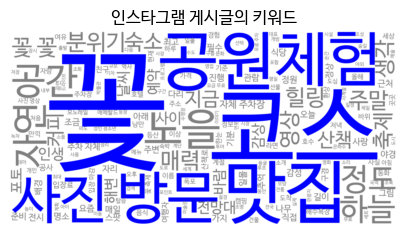

In [405]:
highlighted_words = ["ÏΩîÏä§","Í≥µÏõê","Ï≤¥Ìóò","Î∞©Î¨∏","ÎßõÏßë","ÍΩÉ",'ÏÇ¨ÏßÑ']

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ
        
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(text_total)
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
plt.axis('off')
plt.show()


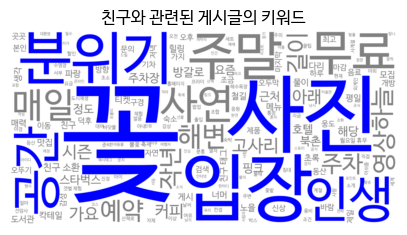

In [398]:
highlighted_words = ["Î∂ÑÏúÑÍ∏∞","Í≥µÍ∞Ñ","ÏÇ¨ÏßÑ","Ïù∏ÏÉù","ÏûÖÏû•","ÍΩÉ"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ
        
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(text_friend)
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('ÏπúÍµ¨ÏôÄ Í¥ÄÎ†®Îêú Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
plt.axis('off')
plt.show()


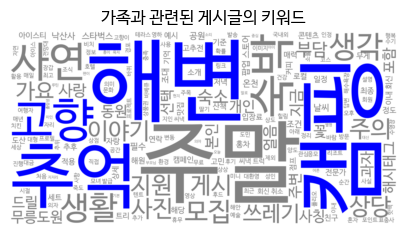

In [402]:
highlighted_words = ["Ï∂îÏñµ","Ï∫†Ìïë","Ìï¥Î≥Ä","Í≥†Ìñ•"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ
        
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(text_family)
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('Í∞ÄÏ°±Í≥º Í¥ÄÎ†®Îêú Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
plt.axis('off')
plt.show()


## ÏπúÍµ¨, Í∞ÄÏ°±Ïóê ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îì§Ïùò ÏùòÎØ∏ ÌôïÏù∏

## LDA

In [381]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.9,min_df=2,ngram_range=(1,2))
features = tfidfVectorizer.fit_transform(review_count['card_clean_okt'])
features.toarray()[:2]
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['Í∞ÄÍ∞Ä', 'Í∞ÄÍ≤å', 'Í∞ÄÍ≤å Íµ¨Í≤Ω', ..., 'ÌûêÎßÅ ÌååÌÅ¨', 'ÌûêÎßÅ ÌîÑÎ°úÍ∑∏Îû®', 'ÌûêÎßÅ ÌûêÎßÅ'],
      dtype=object)

In [382]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_10 = LatentDirichletAllocation(n_components=3, random_state=36) #Ïù∏Ïä§ÌÑ¥Ïä§Ìôî #n_components ÌÜ†ÌîΩÏùò Í∞ØÏàò
lda_model_10.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú 
## 0 ÌôïÎ•† 1ÏùÄ dictionary
topics_list = list()
for topic in lda_model_10.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:5])# ÏãúÎ¶¨Ï¶à ÌòïÏãùÏúºÎ°ú Ï∂úÎ†• get values from series / index 
    topics_list.append(topics_text)
topics_list_add_10 = [['Topic1', 'Topic2','Topic3',],topics_list]
df_topics_keywords_10 = pd.DataFrame(topics_list_add_10)
df_topics_keywords_10=df_topics_keywords_10.T
df_topics_keywords_10

0                    1
0  Topic1      Ï∂ïÏ†ú Í∏∞Ïûê Ìä∏Î∏îÎ¶¨ Í∑∏Î¶º ÏÇ¨ÏßÑ
1  Topic2  Ìï¥ÏãúÌÉúÍ∑∏ ÏÜåÍ∞ú ÏïºÍ≤Ω Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Ïò§Îäò
2  Topic3     ÎÖ∏ÏùÑ ÏΩîÏä§ Ï£ºÏ∞®Ïû• Î∂ÑÏúÑÍ∏∞ ÌïòÎäò

In [383]:
list_topics = []
for i in range(len(lda_model_10.components_)):
    df_datas_0 = [lda_model_10.components_[i], dictionary_list]
    df_topics_0 = pd.DataFrame(data=df_datas_0).T
    df_topics_0 = df_topics_0.dropna()
    df_topics_0 = df_topics_0.sort_values(0, ascending=False).reset_index()
    df_topics_0.rename(columns = {1 : i+1}, inplace = True)
    df_topics_0.rename(columns = {0 : 'score'}, inplace = True)
    list_topics.append(df_topics_0.loc[:4,['score',i+1]])
df_topic = pd.concat(list_topics,axis=1)
df_topic

score    1      score      2      score    3
0  30.785979   Ï∂ïÏ†ú   14.52107   Ìï¥ÏãúÌÉúÍ∑∏  39.256973   ÎÖ∏ÏùÑ
1  23.060291   Í∏∞Ïûê  14.037603     ÏÜåÍ∞ú  38.735107   ÏΩîÏä§
2  22.255973  Ìä∏Î∏îÎ¶¨  13.718607     ÏïºÍ≤Ω   32.72607  Ï£ºÏ∞®Ïû•
3  18.573991   Í∑∏Î¶º  13.307526  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®  32.265787  Î∂ÑÏúÑÍ∏∞
4  17.770328   ÏÇ¨ÏßÑ  12.614766     Ïò§Îäò  30.854598   ÌïòÎäò

In [384]:
import pyLDAvis
import pyLDAvis.lda_model
vis_10 = pyLDAvis.lda_model.prepare(lda_model_10,features,tfidfVectorizer)
vis_10
pyLDAvis.enable_notebook()
components_10_display = pyLDAvis.display(vis_10)
components_10_display

In [385]:
# grid_best_model.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú 
## 0 ÌôïÎ•† 1ÏùÄ dictionary
topics_list = list()
for topic in lda_model_10.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)

In [386]:
topics_output = lda_model_10.transform(features)
df_topics_score = pd.DataFrame(topics_output)
df_topics_score['dominant_topic_number']=np.argmax(topics_output, axis=1)
df_topics_score['dominant_topic_number'].value_counts()

dominant_topic_number
2    2535
0    1210
1     647
Name: count, dtype: int64

In [388]:
review_count.loc[:,'content_topic'] = df_topics_score['dominant_topic_number']
review_count.query("content_topic==0")

card_content  \
2                                                                                                                                                                                         "ÎÑà Í±∞Í∏∞ Í∞Ä #Î¥Ñ?" #Í∞ïÏõêÎèÑ #ÏÇºÏ≤ô #Ïú†Ï±ÑÍΩÉÏ∂ïÏ†ú ÏóêÏÑú Î∞úÍ∏∏ ÎãøÎäî Í≥≥ÎßàÎã§ ÎÖ∏ÎûóÍ≤å ÍΩÉÎßùÏö∏ÏùÑ ÌÑ∞Ìä∏Î¶∞ ÏïÑÎ¶ÑÎã§Ïö¥ Ïú†Ï±ÑÍΩÉ Î¨ºÍ≤∞Ïóê ÎÇ¥ ÎßàÏùåÏùÄ ÏÑ§Î†àÎÇò #Î¥Ñ\n\n#Í∞ïÏõêÎèÑÏó¨Ìñâ #ÍΩÉ #Î¥ÑÍΩÉ #Î¥Ñ #Ïú†Ï±ÑÍΩÉ #Ï∂ïÏ†ú\n#Ïó¨ÌñâÍ∑∏Îû® #Ïó¨Ìñâ #Íµ≠ÎÇ¥Ïó¨Ìñâ #Î¥ÑÏó¨Ìñâ #Î¥ÑÎÇòÎì§Ïù¥\n#ÍΩÉÏä§ÌÉÄÍ∑∏Îû® #ÍΩÉÏó¨Ìñâ #ÌîåÎùºÏõåÍ∑∏Îû® (ÏÇ¨ÏßÑ_ÌïúÍµ≠Í¥ÄÍ¥ëÍ≥µÏÇ¨ ÍπÄÏßÄÌò∏)   
4                                                                                                                                                                                               "ÎÑà Í±∞Í∏∞ Í∞Ä #Î¥Ñ?" Ï≤≠Î™ÖÌïú ÌïòÎäòÏïÑÎûò #Í≤ΩÏ£º #Î∞òÏõîÏÑ± ÏóêÏÑú Ï¶êÍ∏∞Îäî\nÌñ•Í∏ãÌïú Î¥ÑÎÇ¥ÏùåÍ≥º Ïñ¥Ïö∞Îü¨ÏßÑ ÏïÑÎ¶ÑÎã§Ïö¥ ÍΩÉÎì§Ïùò Ìñ•Ïó∞\n\n#Í≤ΩÏ£ºÏó¨Ìñâ #ÍΩÉ #Î¥ÑÍΩÉ #Î¥Ñ #Ìä§Î¶Ω #Ïú†Ï±ÑÍΩÉ #Î≤öÍΩÉ\n#Ïó¨ÌñâÍ∑∏Îû® #Ïó¨Ìñâ #Íµ≠ÎÇ¥Ïó¨Ìñâ #Î¥ÑÏó¨Ìñâ #Î¥ÑÎÇòÎì§Ïù¥\n#ÍΩÉÏä§ÌÉÄÍ∑∏Îû® #ÍΩÉÏó¨Ìñâ #ÌîåÎùºÏõåÍ∑∏Îû®\n(ÏÇ¨ÏßÑ_Seifali Kazemi Îãò)   
6                                                                                                                                                                                       "ÏÇ¨ÎûëÏùò Í≥†Î∞±"Ïùò ÎúªÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäî #Ìä§Î¶Ω. ÏÇ¨ÎûëÌïòÎäî Ïó∞Ïù∏Í≥º ÎÇ≠ÎßåÏ†ÅÏù∏ Î¥ÑÏùÑ Î≥¥ÎÇ¥Í≥† Ïã∂Îã§Î©¥ ÏóêÎ≤ÑÎûúÎìú Ìä§Î¶ΩÏ∂ïÏ†úÏóêÏÑú ÏÇ¨Îûë Í≥†Î∞±ÏùÑ Ìï¥Î≥¥Îäî Í≤ÉÏùÄ Ïñ¥Îñ®ÍπåÏöî?? #Ïö©Ïù∏ #ÏóêÎ≤ÑÎûúÎìú #Ìä§Î¶ΩÏ∂ïÏ†ú #ÏÇ¨Îûë #Ïó∞Ïù∏ #Í≥†Î∞± #ÏäàÌçºÌååÏõå #Yongin #everland #tulipfestival #love #couple #superpower   
9     "ÌûòÎì† Ïù¥ ÏãúÍ∞ÑÏù¥ Ïñ¥ÏÑú ÏßÄÎÇòÍ∞ÄÍ≥†,\nÎ™®ÎëêÍ∞Ä ÏûêÏú†Î°úÏö¥ ÏùºÏÉÅÏúºÎ°ú ÎèåÏïÑÏò§Í≤å Ìï¥Ï£ºÏÑ∏Ïöîüôèüèª"\n‚†Ä\nÏÜåÏõêÏùÑ ÎπåÎ©¥ Ïù¥Î£®Ïñ¥Ïßà Í≤ÉÎßå Í∞ôÏùÄ\nÏù¥Í≥≥ÏùÄ #Ï∂©Ï£º #Ï§ëÏïôÌÉëÍ≥µÏõê !\n‚†Ä\nÏ§ëÏïôÌÉëÍ≥º Î≥¥Î¶ÑÎã¨Ïùò Í≥†Ï¶àÎÑâÌïú Î∂ÑÏúÑÍ∏∞Í∞Ä ÏïÑÎ¶ÑÎã§Ïõå\nÏ∂©Ï£º ÏãúÎØºÎì§ÏóêÍ≤å #Ïù∏ÏÉùÏÉ∑ Î™ÖÏÜåÎ°ú ÏÜåÎ¨∏Ïù¥ ÏûêÏûêÌïú Í≥≥Ïù¥ÏßÄÏöî.\n‚†Ä\nÏ§ëÏïôÌÉëÍ≥µÏõêÏùÄ ÏµúÍ∑º Ï¢ÖÏòÅÌïú ÎìúÎùºÎßà\n#ÏÇ¨ÎûëÏùòÎ∂àÏãúÏ∞© Ïùò Ï¥¨ÏòÅÏßÄÏù¥Í∏∞ÎèÑ ÌïúÎç∞Ïöî.\n‚†Ä\nÎìúÎùºÎßà ÏÜç Ï£ºÏù∏Í≥µÏù¥ ÎêòÏñ¥\n#ÌÉÑÍ∏àÌò∏Î¨¥ÏßÄÍ∞úÍ∏∏ ÏùÑ Í±∑ÎäîÎã§Î©¥,\nÏÉâÎã§Î•∏ Ï∂îÏñµÏùÑ ÎÇ®Í∏∏ Ïàò ÏûàÏßÄ ÏïäÏùÑÍπåÏöî?ÀÉÃµÕàÃë·¥óÀÇÃµÕàÃë\n‚†Ä\nÎ™®ÎëêÍ∞Ä ÎßàÏùå ÎÜìÍ≥† Ïó¨ÌñâÏùÑ Ï¶êÍ∏∏ Ïàò ÏûàÏùÑ ÎïåÍπåÏßÄ\n#ÌûòÎÇ¥ÎùºÎåÄÌïúÎØºÍµ≠ !\n‚†Ä\nüá∞üá∑ #Íµ≠ÎÇ¥Ïó¨Ìñâ ÏùÄ #ÎåÄÌïúÎØºÍµ≠Íµ¨ÏÑùÍµ¨ÏÑù\nüì∑@dear.syrup @shinehwii   
10                                                                                                                                                                                                                                                                       #2017 #Ïò¨Ìï¥ÏùòÍ¥ÄÍ¥ëÎèÑÏãú #Í∞ïÎ¶â\nÏö∞Î¶¨ÎÇòÎùº ÏµúÍ≥†Ïùò #ÎìúÎùºÏù¥Î∏åÏΩîÏä§ Î°ú ÍºΩÌûàÎäî #ÌóåÌôîÎ°ú!\nÌï¥ÏïàÍ∏∏ ÎìúÎùºÏù¥Î∏åÏùò ÎÇ≠ÎßåÏùÑ ÎäêÍª¥Î≥¥ÏÑ∏Ïöî~\n.\n(ÏÇ¨ÏßÑ_2016 Ìä∏ÎûòÎ∏îÎ°úÍ±∞ ÍπÄÎÖ∏ÏùÑ)   
...                                                                                                                                                                                                                                                                                                                                                                 ...   
4371                                  ü§öÎ∂ÄÏ≤òÎãòÏùò ÏÜêÎ∞îÎã•Í∞ôÏùÄ Í±∞ÎåÄÌïú Í∏∞ÏïîÍ¥¥ÏÑùÏù¥ ÏûàÎäî Ïù¥Í≥≥ÏùÄ #ÎÇ®Ìï¥ #Î≥¥Î¶¨Ïïî ÏûÖÎãàÎã§.\n\nÍ∏∞Ï°¥Ïóê Î≥¥Îçò Î≥¥Î¶¨ÏïîÏùò ÌíçÍ≤Ω Î™®ÏäµÍ≥º Ï°∞Í∏à ÏÉâÎã§Î•∏ Íµ¨ÎèÑÏùò ÌíçÍ≤ΩÏù∏Îç∞Ïöî!\nÏÜåÎ∞ïÌïú Î™®ÏäµÏùò Í∏∞ÏôÄÏßë Îí§Î°ú Îã®Îã®ÌïòÍ≤å Î≤ÑÌã∞Í≥† ÏûàÎäî Î™®ÏäµÏù¥\nÎßàÏπò ÎßåÌôîÏóêÏÑúÎÇò Îì±Ïû•Ìï† Î≤ïÌïú Î™®ÏäµÏûÖÎãàÎã§\n\nÏ≤≠Î™ÖÌïú ÌïòÎäòÏùÑ Í∞ÄÎ•¥Î©∞ Ïö∞Îöù ÏÑú ÏûàÎäî Î≥¥Î¶¨ÏïîÏùò ÌíçÍ≤ΩÏùÑ Î≥¥Î©∞‚òÅÔ∏è\nÏàòÏöîÍ≥†Í∞úÎ•º ÏÉÅÏæåÌïòÍ≤å ÎÑòÏñ¥Î≥¥ÏÑ∏Ïöî‚óü( Àò ¬≥Àò)‚óû ‚ô°\n\nüì∏@kimhakjaelandscape Îãò\n\n‚òÖÏΩîÎ°úÎÇò19Ïùò ÌôïÏÇ∞ÏúºÎ°ú ÏàòÎèÑÍ∂å Î∞è ÏùºÎ∂Ä ÏßÄÏó≠Ïù¥ #ÏÇ¨ÌöåÏ†ÅÍ±∞Î¶¨ÎëêÍ∏∞ 2.5Îã®Í≥ÑÎ°ú Í≤©ÏÉÅÎêòÏóàÏäµÎãàÎã§. Ïö∞Î¶¨ Î™®Îëê Í±¥Í∞ïÌïú 